In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [2]:
import corner as DFM

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
# load compiled zsuccess rates to file
dat_dir = '/global/cfs/cdirs/desi/users/chahah/bgs-cmxsv/sv-paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.fuji.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.fuji.fits'))
#main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v3.fits'))

In [5]:
sv1_deep  = (sv1_gals['DEEP_EXPTIME'] > 2000) 
sv3_deep  = (
    np.isin(sv3_gals['PRIORITY'].data, np.array([102100, 102000])) & # remove reobservations
    (sv3_gals['EFFTIME_SPEC'] > 100)) # some exposures with very low spectroscopic efftime

print(np.mean(sv1_deep), np.mean(sv3_deep))
print(np.sum(sv1_deep), np.sum(sv3_deep))

0.9434978117997384 0.6126924774378738
125472 176309


In [6]:
sv1_gmag = sv1_gals['GMAG_DRED'] 
sv1_rmag = sv1_gals['RMAG_DRED'] 
sv1_zmag = sv1_gals['ZMAG_DRED']
sv1_rfib = sv1_gals['FIBER_RMAG_DRED']
sv1_colr = sv1_gals['FAINT_FIBCOL']

sv1_brgt = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_lowq = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_LOWQ']) != 0 
sv1_fain = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0

sv3_gmag = sv3_gals['GMAG_DRED']
sv3_rmag = sv3_gals['RMAG_DRED']
sv3_zmag = sv3_gals['ZMAG_DRED']
sv3_rfib = sv3_gals['FIBER_RMAG_DRED']
sv3_colr = sv3_gals['FAINT_FIBCOL']

sv3_brgt = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_fain = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

In [7]:
dv = np.abs(sv3_gals['Z_TRUE'] - sv3_gals['Z']) * 299792.458 # km/s

In [8]:
sv3_zlim = sv3_gals['Z'] < 0.4

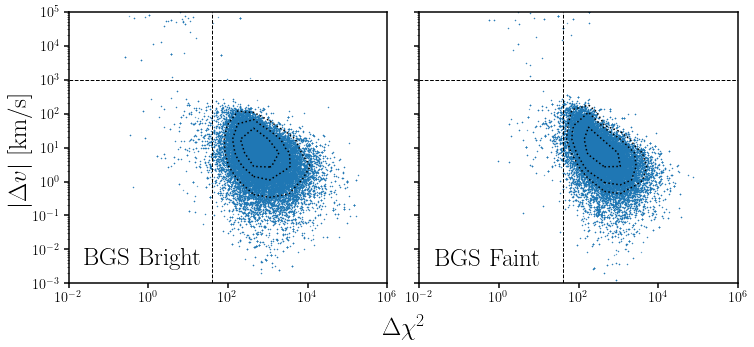

In [25]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(121)
DFM.hist2d(sv3_gals['DELTACHI2'][sv3_zlim & sv3_brgt & sv3_deep], dv[sv3_zlim & sv3_brgt & sv3_deep], 
           axes_scale=['log', 'log'], range=[(1e-2, 1e6), (1e-3, 1e5)], 
           contour_kwargs={'colors': 'k', 'linestyles': ':'}, 
           plot_density=False, plot_datapoints=False, fill_contours=False)
sub.scatter(sv3_gals['DELTACHI2'][sv3_zlim & sv3_brgt & sv3_deep], dv[sv3_zlim & sv3_brgt & sv3_deep], 
            c='C0', s=0.1, rasterized=True)
#sub.scatter(sv3_gals['DELTACHI2'][sv3_zlim & sv3_brgt & sv3_deep & ~sv3_gals['ZSUCCESS']], dv[sv3_zlim & sv3_brgt & sv3_deep & ~sv3_gals['ZSUCCESS']], c='r', s=1)
sub.axvline(40., color='k', linestyle='--', lw=1)
sub.axhline(1000., color='k', linestyle='--', lw=1)
sub.text(0.05, 0.05, r'BGS Bright', ha='left', va='bottom', transform=sub.transAxes, fontsize=25)

sub.set_xlim(1e-2, 1e6)
sub.set_xscale('log')
sub.set_yscale('log')

sub = fig.add_subplot(122)
DFM.hist2d(sv3_gals['DELTACHI2'][sv3_zlim & sv3_fain & sv3_deep], dv[sv3_zlim & sv3_fain & sv3_deep], 
           axes_scale=['log', 'log'], range=[(1e-2, 1e6), (1e-3, 1e5)], 
           contour_kwargs={'colors': 'k', 'linestyles': ':'}, 
           plot_density=False, plot_datapoints=False, fill_contours=False)

sub.scatter(sv3_gals['DELTACHI2'][sv3_zlim & sv3_fain & sv3_deep], dv[sv3_zlim & sv3_fain & sv3_deep], 
            c='C0', s=0.1, rasterized=True)
sub.axvline(40., color='k', linestyle='--', lw=1)
sub.axhline(1000., color='k', linestyle='--', lw=1)
sub.text(0.05, 0.05, r'BGS Faint', ha='left', va='bottom', transform=sub.transAxes, fontsize=25)
sub.set_xlim(1e-2, 1e6)
sub.set_xscale('log')
sub.set_yscale('log')
sub.set_yticklabels('')


bkgd = fig.add_subplot(111, frameon=False)
bkgd.set_xlabel(r'$\Delta \chi^2$', labelpad=10, fontsize=25) 
bkgd.set_ylabel(r'$|\Delta v|$ [km/s]', labelpad=10, fontsize=25) 
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.subplots_adjust(wspace=0.1)
fig.savefig('figs/delv_dchi2.pdf', bbox_inches='tight')

In [20]:
!pwd

/global/u1/c/chahah/projects/bgs-cmxsv/doc/sv_paper


In [11]:
from astropy.table import Table

In [15]:
fig_data1 = Table()
fig_data1['DELTACHI2'] = sv3_gals['DELTACHI2'][sv3_zlim & sv3_brgt & sv3_deep]
fig_data1['dv'] = dv[sv3_zlim & sv3_brgt & sv3_deep]
fig_data1.write('/global/cfs/cdirs/desi/users/chahah/sv_overview_paper/sv_overview_paper.fig9.data.bgs_bright.ecsv', 
                format='ascii.ecsv')

In [16]:
fig_data2 = Table()
fig_data2['DELTACHI2'] = sv3_gals['DELTACHI2'][sv3_zlim & sv3_fain & sv3_deep]
fig_data2['dv'] = dv[sv3_zlim & sv3_fain & sv3_deep]
fig_data2.write('/global/cfs/cdirs/desi/users/chahah/sv_overview_paper/sv_overview_paper.fig9.data.bgs_faint.ecsv', 
                format='ascii.ecsv')